# Module Title:	 Machine Learning for Business  
### Assessment Title:  MLBus_HDipData_CA1
### Lecturer Name:	 Dr. Muhammad Iqba  
### Student Full Name & Number:	Natalia de Oliveira Rodrigues 2023112 and Heitor Gomes de Araujo Filho 2023098

This CA will assess student attainment of the following minimum intended learning outcomes:

1. Critically evaluate and implement appropriate clustering algorithms and interpret and document 
their results. (Linked to PLO 1, PLO 5)
2. Apply modelling to time series data to facilitate business intelligence needs (Linked to PLO 1, PLO 2, 
PLO 3

**Project Objective:** 
Perform time series analysis on the historical plane crash data and use clustering techniques to identify patterns and clusters of crash incidents over time. 

1. **Temporal Patterns Analysis:** How the frequency of plane crashes has evolved over the years. Are there any long-term trends or seasonal patterns in crash occurrences?

2. **Clustering of Crash Incidents:** Identify commonalities among different incidents using clustering algorithms to group similar plane crashes based on characteristics such as crash causes, flight phases, and other relevant factors. 

3. **Visualization of Clustered Data:** How certain types of crashes have become more or less prevalent over the years?(identified clusters over time)

4. **Anomaly Detection:** These could be extreme or unusual crash incidents that deviate from the typical patterns.

5. **Forecasting:** Predict the future trend of plane crashes based on historical data using time series forecasting models. (valuable tool for aviation safety assessment)

6. **Interpreting Cluster Characteristics:**  Are there specific conditions or causes that lead to certain types of accidents? Investigate the characteristics and factors that contribute for each cluster of crashes formation.

7. **Evaluation of Clustering Methods:** Compare and evaluate different clustering algorithms to determine which one provides the most meaningful insights into the dataset.

**Aims:** 
- Deeper understanding of the historical plane crash data, 
- Identify recurring patterns, 
- Potentially discover factors that contribute to certain types of accidents. 

# Exploratory Data Analysis

In [1]:
# Most commun libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Libraries for Preprocessing encoding
from sklearn.preprocessing import LabelEncoder

# Libraries for Preprocessing scaling
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

# Libraries for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa # can access various time series analysis functions, classes, and models for tasks such as time series forecasting, seasonality analysis, and autocorrelation analysis

# Libraries for model validation
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset from Plane Crashes.csv
df = pd.read_csv('Plane Crashes.csv', parse_dates = True)

In [4]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Sort the dataset by the 'Date' column
df = df.sort_values(by='Date')

In [6]:
# Set the 'Date' column to index
df.index = df['Date']

# Drop the 'Date' column from the dataframe
df.drop('Date', axis = 1, inplace = True)

In [7]:
# Select the past 10 Years data - The recent data allow us to capture contemporary trends and patterns.
df = df.loc['2012-05-31':]

In [8]:
def glimpse(df):
    display(f'There are {df.shape[0]} observations and {df.shape[1]} attributes in this dataset.')
    print("-" * 120)
    display(df.head(3))
    print("-" * 120)
    display(df.tail(3))
    print("-" * 120)
    display(df.describe())
    print("-" * 120)
    display(df.info())
    print("-" * 120)
    display(df.isnull().sum().sort_values(ascending=False))
    
glimpse(df)

'There are 1448 observations and 23 attributes in this dataset.'

------------------------------------------------------------------------------------------------------------------------


,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-01,12H 35M 0S,Boeing 737-400,Sriwijaya Air,PK-CJV,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Jakarta - Pontianak,24689/1883,...,Indonesia,Asia,8.0,0.0,155.0,0.0,0.0,0,The approach to Pontianak was unstable and rea...,Weather
2012-06-02,19H 10M 0S,Boeing 727-200,Allied Air,5N-BJN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Lagos - Accra,22540/1796,...,Ghana,Africa,4.0,0.0,0.0,0.0,10.0,10,"On 2nd June, 2012 at 1828hrs Allied Air Ltd Fl...",Human factor
2012-06-03,15H 45M 0S,McDonnell Douglas MD-83,Dana Air,5N-RAM,Landing (descent or approach),Scheduled Revenue Flight,No,City,Abuja - Lagos,53019/1783,...,Nigeria,Africa,6.0,6.0,147.0,147.0,6.0,159,"On 3rd June, 2012 at about 1545:00hrs, 5N-RAM,...",Technical failure


------------------------------------------------------------------------------------------------------------------------


,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,456,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,619,...,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor
2022-06-03,13H 46M 0S,Cessna 208B Grand Caravan,GoJump Oceanside,N7581F,Landing (descent or approach),Skydiving / Paratroopers,Yes,Airport (less than 10 km from airport),Oceanside - Oceanside,208B-0389,...,United States of America,North America,1.0,0.0,1.0,1.0,0.0,1,The single engine was completing local skydivi...,Unknown


------------------------------------------------------------------------------------------------------------------------


,YOM,Flight no.,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities
count,1397.000000,0.0,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000
mean,1981.030064,NaN,2.479282,1.100138,12.390884,3.654006,0.116713,4.870856
std,106.255014,NaN,2.377239,1.876358,35.101578,18.804998,1.375387,20.041092
min,16.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1977.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1985.000000,NaN,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1998.000000,NaN,3.000000,1.000000,6.000000,1.000000,0.000000,3.000000
max,2020.000000,NaN,19.000000,17.000000,291.000000,283.000000,35.000000,298.000000


------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1448 entries, 2012-06-01 to 2022-06-03
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1307 non-null   object 
 1   Aircraft          1448 non-null   object 
 2   Operator          1448 non-null   object 
 3   Registration      1432 non-null   object 
 4   Flight phase      1447 non-null   object 
 5   Flight type       1444 non-null   object 
 6   Survivors         1446 non-null   object 
 7   Crash site        1448 non-null   object 
 8   Schedule          1308 non-null   object 
 9   MSN               1399 non-null   object 
 10  YOM               1397 non-null   float64
 11  Flight no.        0 non-null      float64
 12  Crash location    1448 non-null   object 
 13  Country           1448 non-null   object 
 1

None

------------------------------------------------------------------------------------------------------------------------


Flight no.          1448
Time                 141
Schedule             140
YOM                   51
MSN                   49
Registration          16
Flight type            4
Survivors              2
Flight phase           1
Operator               0
Crew fatalities        0
Circumstances          0
Total fatalities       0
Other fatalities       0
PAX fatalities         0
Pax on board           0
Crash location         0
Crew on board          0
Region                 0
Country                0
Aircraft               0
Crash site             0
Crash cause            0
dtype: int64

# Data Preprocessing 
Data preprocessing primarily focuses on cleaning, transforming, and preparing raw data for immediate analysis or modeling. Data preprocessing involves tasks such as handling missing data, dealing with outliers, scaling features, encoding categorical variables, and ensuring data is ready for analysis or model training. 


### Data Preprocessing: Investigating numerical variables

In [9]:
# This will convert columns dtype
columns_to_convert = ['YOM', 'Crew on board', 'Crew fatalities', 'Pax on board', 'PAX fatalities', 
                      'Other fatalities', 'Total fatalities']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')

In [10]:
# Invalid values column Year of manufacture
df.YOM.unique()

<IntegerArray>
[1990, 1982, 1959, 2006, 1993, 1976, 1981, 1986, 1970, 1968, 2008, 1969, 2007,
 1987, 1973, 1994, 1979, 1974, <NA>, 2001, 1985, 1980, 2009, 2011, 1967, 1975,
 2010, 1991, 1978, 1956, 2005, 1989, 1934, 2012, 1957, 1971, 2000, 1992, 1983,
 1988, 1977, 1944, 1998, 1984, 1997, 2002, 1963, 1999, 1958, 2013, 1943, 1964,
 2004, 1951, 1930, 2003, 1995, 1972, 1996, 1952,   26, 1953, 2014,   18, 1960,
   23, 1966, 2015, 1961, 1954, 1965, 1928,   16, 1945, 1955, 2016, 1948, 1939,
 2017, 2018, 1942, 1962, 2020, 2019]
Length: 84, dtype: Int64

In [11]:
# To create a filter valid_year where only values after 1900 and before 2022 will be kept
valid_years = (df['YOM'] >= 1900) & (df['YOM'] <= 2022)
df = df[valid_years]

### Data Preprocessing: Investigating categorical variables

In [12]:
df.describe(include = 'object').T

,count,unique,top,freq
Time,1273,614,10H 0M 0S,21
Aircraft,1393,253,Cessna 208B Grand Caravan,69
Operator,1393,1118,Private American,27
Registration,1392,1391,UR-54853,2
Flight phase,1392,5,Landing (descent or approach),653
Flight type,1389,27,Private,328
Survivors,1392,2,Yes,834
Crash site,1393,6,Airport (less than 10 km from airport),787
Schedule,1273,1241,Ketchikan - Ketchikan,4
MSN,1391,1362,265,3


In [13]:
# This investigate unique values of Region attribute
df.Region.unique()

array(['Asia', 'Africa', 'North America', 'South America', 'Europe',
       'Central America', 'Oceania', 'Antarctica', 'World'], dtype=object)

In [14]:
# This investigate how many observations where Region is World
df_region_check = df[df['Region'] == 'World']
print(f'There are {df_region_check.shape[0]} observations where Region is classified as World.')

There are 13 observations where Region is classified as World.


**Region:**
- World is a way to classify aviation incidents that do not belong to a specific continent or region. For example when it happen in internatinal airspace, or over oceans, or in locations that do not fall within the boundaries of a specific continent. 

- America continent is split in North America, South America and Central America to provide more detailed information regarding the region of the aviation incidents. 


In [15]:
# This investigate unique values of Crash cause attribute
df['Crash cause'].unique()

array(['Weather', 'Human factor', 'Technical failure', 'Unknown',
       'Other causes', 'Terrorism act, Hijacking, Sabotage'], dtype=object)

In [16]:
# This investigate how many observations where Crash cause is Unknown
df_cause_check = df[df['Crash cause'] == 'Unknown']
print(f'There are {df_cause_check.shape[0]} observations where Crash cause is classified as Unknown.')

There are 392 observations where Crash cause is classified as Unknown.


In [17]:
df['Flight type'].value_counts()

Flight type
Private                                        328
Scheduled Revenue Flight                       202
Charter/Taxi (Non Scheduled Revenue Flight)    158
Cargo                                          141
Military                                        66
Training                                        63
Positioning                                     63
Executive/Corporate/Business                    59
Illegal (smuggling)                             40
Skydiving / Paratroopers                        40
Ambulance                                       39
Spraying (Agricultural)                         31
Test                                            26
Survey / Patrol / Reconnaissance                25
Ferry                                           25
Government                                      20
Humanitarian                                    16
Fire fighting                                   15
Geographical / Geophysical / Scientific          9
Meteorological / We

**Flight type:**
- Private: Private flights are those operated by individuals or organizations for non-commercial, personal, or business purposes.
- Scheduled Revenue Flight: These are the typical passenger or cargo flights you find in commercial aviation. Passengers purchase tickets or cargo space, and the flights follow a set timetable.
- Charter/Taxi (Non Scheduled Revenue Flight): Charter or non-scheduled revenue flights are flights that are not part of regular airline schedules. They are typically arranged on a case-by-case basis for specific customers or purposes.
- Survey / Patrol / Reconnaissance: they are operated for purposes like aerial photography, monitoring, or data collection.


### Data Preprocessing: Encoding categorical variables
- Nominal variables = one-hot encoded (Aircraft, Operator, Flight type, Crash site, Schedule, Chash location, Country, Crash cause, Circumstances
- Ordinal variables = label encoded (if the order is meaningful: Survivors and Flight phase).

In [18]:
df['Survivors'].unique()

array(['Yes', 'No', nan], dtype=object)

In [19]:
# Create a LabelEncoder object for Survivors attribute
label_encoder = LabelEncoder()

# Apply label encoding to the "Survivors" column
df['Survivors_encoded'] = label_encoder.fit_transform(df['Survivors'])

It appears that these flight phases have a logical order based on the unique variables you gave, therefore utilizing LabelEncoder is a fair strategy.

In [20]:
# Create a LabelEncoder object for Flight phase attribute  
df['Flight phase'].unique()

array(['Landing (descent or approach)', 'Flight', 'Takeoff (climb)',
       'Parking', 'Taxiing', nan], dtype=object)

In [21]:
# Define a custom mapping of 'Flight phase' to numerical values
custom_mapping = {
    'Parking': 0,
    'Taxiing': 1,
    'Takeoff (climb)': 2,
    'Landing (descent or approach)': 3,
    'Flight': 4
}

# Map the 'Flight phase' column to the custom numerical values
df['Flight phase_encoded'] = df['Flight phase'].map(custom_mapping).astype('Int64')

### Data Preprocessing: Handling missing data

In [22]:
# This removes the attributes with high missing data values, and attributes without variance(unique identifiers). 
df = df.drop(columns=["Flight no.", "Time", 'MSN','Registration'])

In [23]:
# This removes all rows with any missing values - Less than 2% of the data will be dropped
df.dropna(inplace=True) 

In [24]:
print(f'The new dataset shape: {df.shape}')
df.isnull().sum().sort_values(ascending=False)

The new dataset shape: (1273, 21)


Aircraft                0
Crew on board           0
Survivors_encoded       0
Crash cause             0
Circumstances           0
Total fatalities        0
Other fatalities        0
PAX fatalities          0
Pax on board            0
Crew fatalities         0
Region                  0
Operator                0
Country                 0
Crash location          0
YOM                     0
Schedule                0
Crash site              0
Survivors               0
Flight type             0
Flight phase            0
Flight phase_encoded    0
dtype: int64

# Data Visualization

- Aircraf 253 unique Vs YOM
- YOM
- Flight phase
- Flight type
- Survivors
- Crash site
- Country/Region
- Crash cause
- Crews or Pax aboard
- Fatalities

# Time Series Analysis

### Create time series features based on time series index

In [25]:
# Funtion to create new attributes based on index
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.day_of_week # Monday 0 and Sunday 6
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

# Call the function
new_df = create_features(df)

In [26]:
new_df.describe()

,YOM,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Survivors_encoded,Flight phase_encoded,hour,dayofweek,quarter,month,year,dayofyear
count,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.000000,1273.0,1273.0,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,1986.912804,2.534171,1.124116,13.811469,4.08641,0.131972,5.342498,0.593087,2.995287,0.0,3.079340,2.568735,6.728987,2016.275727,189.329144
std,15.900272,2.37895,1.919854,37.145883,20.009716,1.466027,21.313744,0.491451,0.755468,0.0,1.986785,1.097537,3.358962,2.828458,102.920281
min,1928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,1.000000,2012.000000,2.000000
25%,1977.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,0.0,1.000000,2.000000,4.000000,2014.000000,105.000000
50%,1985.0,2.0,1.0,2.0,0.0,0.0,1.0,1.000000,3.0,0.0,3.000000,3.000000,7.000000,2016.000000,193.000000
75%,1999.0,3.0,1.0,6.0,1.0,0.0,3.0,1.000000,4.0,0.0,5.000000,4.000000,10.000000,2019.000000,276.000000
max,2020.0,18.0,17.0,291.0,283.0,35.0,298.0,1.000000,4.0,0.0,6.000000,4.000000,12.000000,2022.000000,366.000000


### Temporal Patterns Analysis: How the frequency of plane crashes has evolved over the past 10 years. Are there any long-term trends or seasonal patterns in crash occurrences?

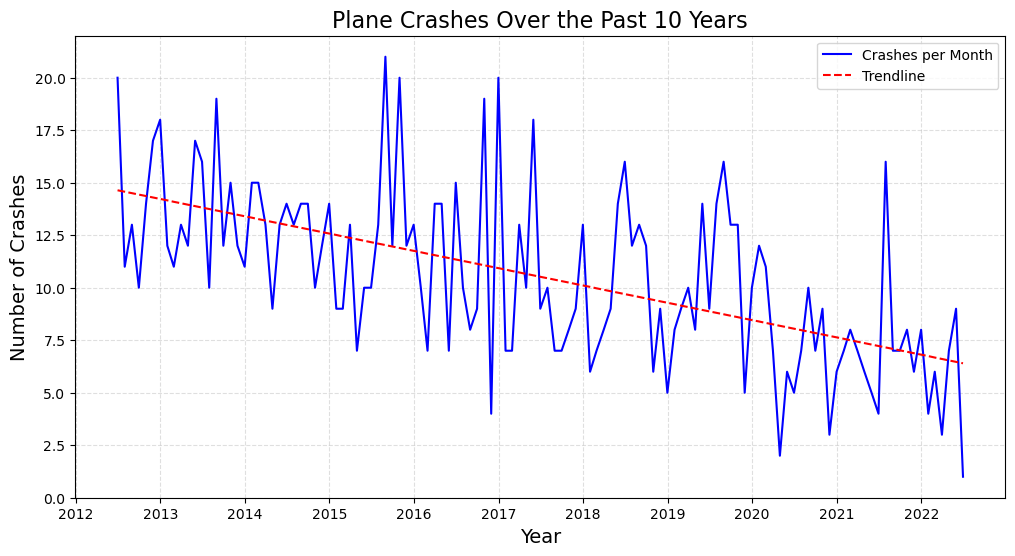

In [27]:
# Group data by year and count the number of crashes in each year
crashes = df.resample('M').size()

# Create a time series plot
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(x=crashes.index, y=crashes.values, label='Crashes per Month', color='b')

# Add a trendline (linear regression)
from sklearn.linear_model import LinearRegression
X = np.arange(len(crashes)).reshape(-1, 1)
y = crashes.values
reg = LinearRegression().fit(X, y)
trendline = reg.predict(X)
plt.plot(crashes.index, trendline, linestyle='--', label='Trendline', color='r')

plt.title('Plane Crashes Over the Past 10 Years',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Crashes',fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.4)

# Provide a clear legend
plt.legend()

plt.show()


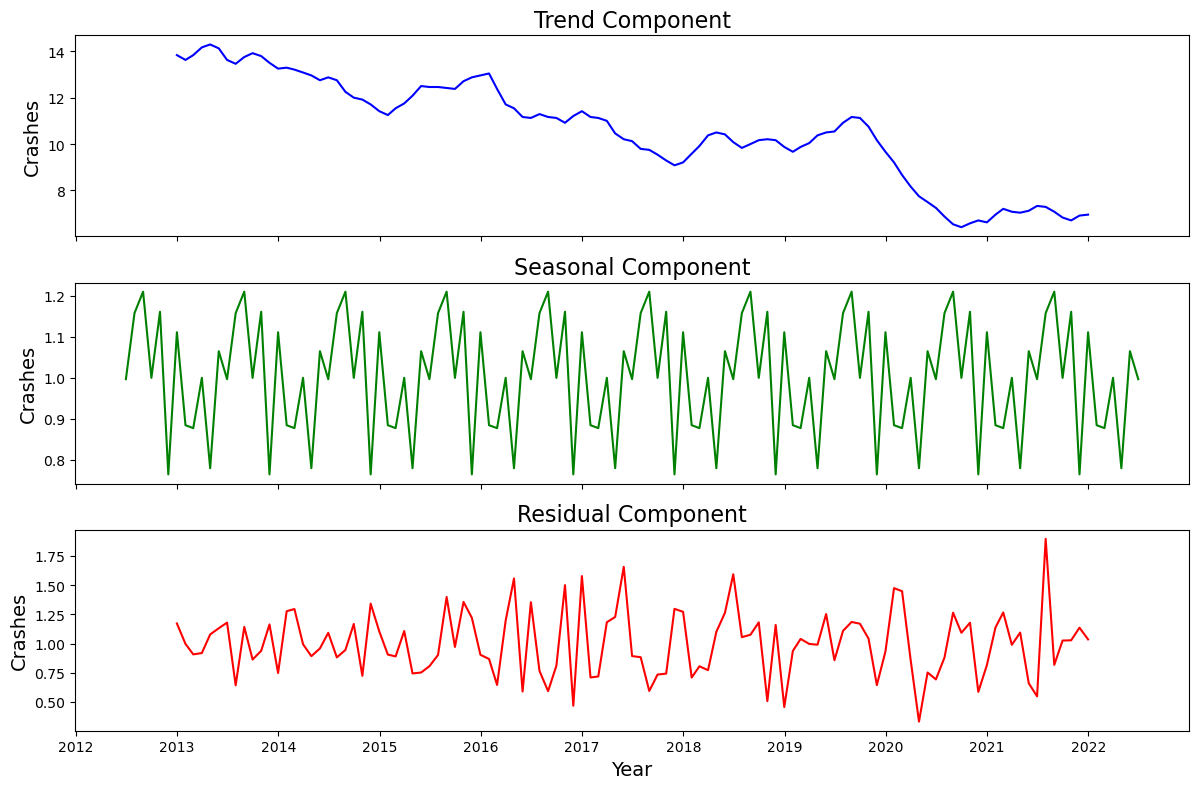

In [28]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(crashes, model='multiplicative')

# Create a 3x1 grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot the trend component
axes[0].plot(decomposition.trend, color='b')
axes[0].set_title('Trend Component',fontsize=16)
axes[0].set_ylabel('Crashes',fontsize=14)

# Plot the seasonal component
axes[1].plot(decomposition.seasonal, color='g')
axes[1].set_title('Seasonal Component',fontsize=16)
axes[1].set_ylabel('Crashes',fontsize=14)

# Plot the residual component
axes[2].plot(decomposition.resid, color='r')
axes[2].set_title('Residual Component',fontsize=16)
axes[2].set_ylabel('Crashes',fontsize=14)

# Customize axis labels
axes[2].set_xlabel('Year',fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()




**Done:**

**24/10/2023**
- Date columns had dtype changed to datatime
- Data must be transformed in the dataset index and ascending sorted
- 4 Columns dropped
- The past 10 years was selected to captured conteponrary trends and patterns (Dataset contain data up to 03-06-2022)
- Less than 2% of missing data was dropped
- YOM, Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities, must be transformed in integer
- YOM has incorrect values like 16,18,23,26 when we are expecting 4 digit value YEAR like 2023

**25/10/2023**
- Investigate Categorical Data
- Data Normalization
- Data Visualization: The frequency of plane crashes & Decomposition